In [ ]:
import pandas as pd

In [ ]:
thal = pd.read_csv('thal.csv')# Dropping null values
thal = thal.dropna()
thal.head()

,sex,hb,pcv,rbc,rdw,wbc,neut,plt,phenotype
0,0,10.8,35.2,5.12,13.4,9.6,53.0,309.0,1
1,1,10.8,26.6,4.28,19.8,10.3,49.4,687.0,1
2,0,10.8,35.2,5.12,13.4,9.6,53.0,309.0,1
3,1,14.5,43.5,5.17,12.1,11.9,31.0,334.0,1
4,1,11.5,34.4,5.02,15.7,20.4,67.0,596.0,1


In [ ]:
thal['phenotype'].value_counts()

1    147
0     55
Name: phenotype, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [ ]:
X = thal.drop('phenotype',axis=1)
y = thal['phenotype']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train,y_train)
rf = RandomForestClassifier()
rf.fit(X_over,y_over)

RandomForestClassifier()

In [ ]:
preds = rf.predict(X_test)
print(accuracy_score(y_test,preds))

0.6341463414634146


In [ ]:
import joblib
joblib.dump(rf, 'thal_model.pkl') 

['thal_model.pkl']

In [ ]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

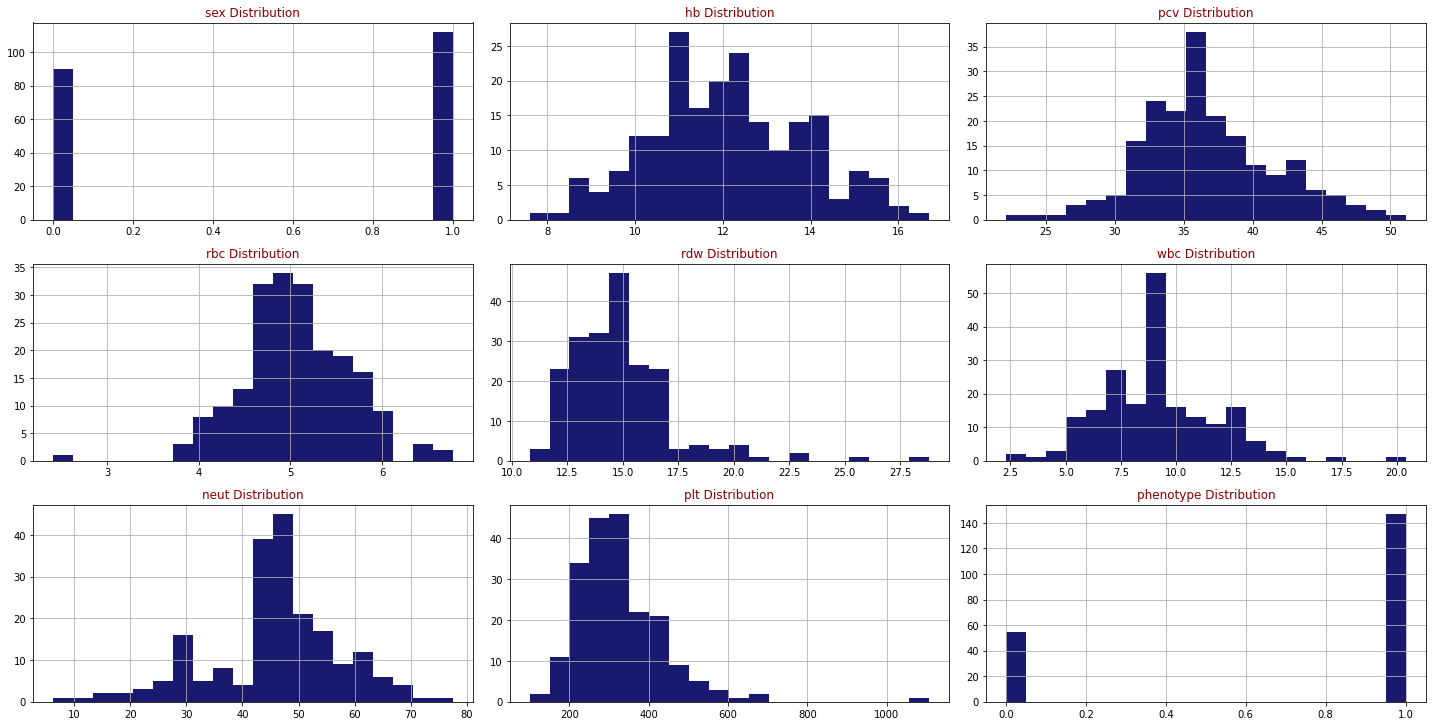

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(thal,thal.columns,6,3)